# Understanding Global COVID-19 Cases
## Eric Oliverio

# Import Data 

In [1]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load our data
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


In [2]:
 #Let's see the top 10 most infected places as of 3/26
#today = df.shape[1]-
today = len(df.columns)-1
df_top = df.sort_values(df.columns[today], ascending = False)




In [3]:
df_top.head(11)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,213372,243762,275586,308853,337072,366667,396223,429052,461437,496535
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,104118,112065,119199,126168,131646,136675,141942,148220,153222,158273
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,110574,115242,119827,124632,128948,132547,135586,139422,143626,147577
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,56989,59105,64338,89953,92839,98010,109069,112950,117749,124869
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,77872,84794,91159,96092,100123,103374,107663,113296,118181,122171
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,29474,33718,38168,41903,47806,51608,55242,60733,65077,73758
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,47593,50468,53183,55743,58226,60500,62589,64586,66220,68192
62,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67802,67802,67802,67803,67803,67803,67803,67803,67803,67803
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,15679,18135,20921,23934,27069,30217,34109,38226,42282,47029
23,NaN,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,13964,15348,16770,18431,19691,20814,22194,23403,24983,26667


We can see the U.S. has the most cases, followed by Italy, the Hubei province of China, Spain, Germany, and Iran. 

#### Between provinces/countires/lat/long, there are many locations. We won't look at lat/long data yet so remove those

In [4]:
df.drop(['Lat','Long'], axis=1,inplace=True)

2. Now let's sort out all provinces (these exist for China, Canada, and some territories of France, U.K., Denmark, and the Netherlands)



# China and its provinces
Let's sum up all provinces for each day

In [5]:
#find chinese provences
dc1 = df.loc[df['Country/Region'] == 'China']
dc1.drop(['Country/Region'], axis=1,inplace=True)

#sum the provinces as append/this is what we need
dc1 = dc1.append(dc1.sum(numeric_only=True),ignore_index=True)
dc1.at[33, 'Province/State'] = 'Daily_total'



/Users/ericoliverio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Hubei was the epicenter, followed by Guangdong, Henen, and Zhejiang

## Top provinces

In [6]:
#This is what we needed
pos_china = dc1.loc[33]

#what provinces were hit the worst?
dc1.sort_values(by=['3/26/20'], ascending=False).head(5)

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
33,Daily_total,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.0,8141.0,...,82361.0,82432.0,82511.0,82543.0,82602.0,82665.0,82718.0,82809.0,82883.0,82941.0
13,Hubei,444.0,444.0,549.0,761.0,1058.0,1423.0,3554.0,3554.0,4903.0,...,67802.0,67802.0,67802.0,67803.0,67803.0,67803.0,67803.0,67803.0,67803.0,67803.0
5,Guangdong,26.0,32.0,53.0,78.0,111.0,151.0,207.0,277.0,354.0,...,1501.0,1507.0,1514.0,1516.0,1524.0,1532.0,1533.0,1536.0,1539.0,1544.0
11,Henan,5.0,5.0,9.0,32.0,83.0,128.0,168.0,206.0,278.0,...,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0
32,Zhejiang,10.0,27.0,43.0,62.0,104.0,128.0,173.0,296.0,428.0,...,1257.0,1258.0,1260.0,1262.0,1263.0,1264.0,1265.0,1266.0,1267.0,1267.0


## Reformat/pivot

In [7]:
#reformat
dc1 = dc1.T
new_header = dc1.iloc[0] #grab the first row for the header
dc = dc1[1:] #take the data less the header row
dc.columns = new_header
dc.index.names = ['Date']

dc.head()

Province/State,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,...,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Xinjiang,Yunnan,Zhejiang,Daily_total
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,1,14,6,1,0,26,2,1,4,1,...,2,9,1,5,4,0,0,1,10,548
1/23/20,9,22,9,5,2,32,5,3,5,1,...,6,16,1,8,4,0,2,2,27,643
1/24/20,15,36,27,10,2,53,23,3,8,2,...,15,20,1,15,8,0,2,5,43,920
1/25/20,39,41,57,18,4,78,23,4,19,8,...,27,33,6,28,10,0,3,11,62,1406
1/26/20,60,68,75,35,7,111,36,5,22,13,...,46,40,9,44,14,0,4,16,104,2075


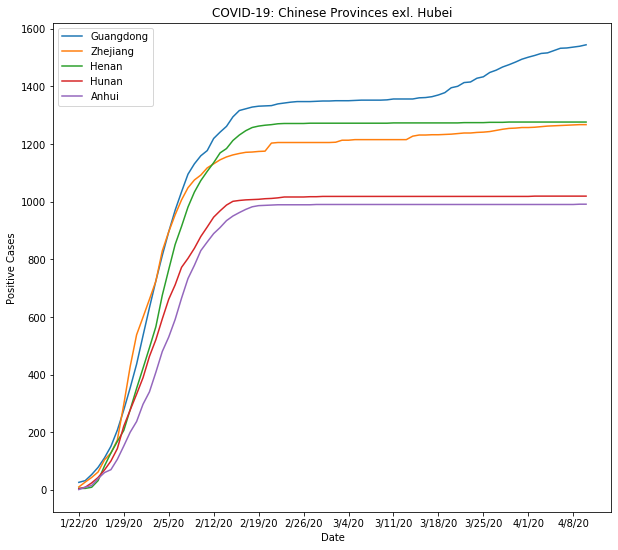

In [8]:
plt.figure(figsize=(10,9))

plt.plot(dc.index,dc.Guangdong)
plt.plot(dc.index,dc.Zhejiang)
plt.plot(dc.index,dc.Henan)
plt.plot(dc.index,dc.Hunan)
plt.plot(dc.index,dc.Anhui)
plt.legend(['Guangdong','Zhejiang','Henan','Hunan','Anhui'])
plt.title('COVID-19: Chinese Provinces exl. Hubei')
plt.ylabel('Positive Cases')
plt.xlabel('Date')

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.show()

# Global Data + China

In [9]:
#Remove provinces/states

def nans(df): 
    return df[df.isnull().any(axis=1)]

### 

In [10]:
df = nans(df)

#add china
df = df.append(pos_china.T,ignore_index=True)
#df.at[end, 'Country/Region'] = 'China'
df.drop(['Province/State'], axis=1,inplace=True)

df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,237.0,273.0,281.0,299.0,349.0,367.0,423.0,444.0,484.0,521.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,259.0,277.0,304.0,333.0,361.0,377.0,383.0,400.0,409.0,416.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,847.0,986.0,1171.0,1251.0,1320.0,1423.0,1468.0,1572.0,1666.0,1761.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,390.0,428.0,439.0,466.0,501.0,525.0,545.0,564.0,583.0,601.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,8.0,10.0,14.0,16.0,17.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,South Sudan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,4.0
179,Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0
180,Sao Tome and Principe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0
181,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Reformat/Pivot

In [11]:
#top five values
#Sort top time then Bar plot

#df10 = df.T

#top five values
#Sort top time then Bar plot

today = len(df.columns)-1
df_10 = df.sort_values(df.columns[today],ascending=False)
#df_10 = df
#df_10 = df_10.drop('glo_Positive')
df_ten = df_10.head(6)
df_ten = df_ten.T

new_header = df_ten.iloc[0] #grab the first row for the header
df10 = df_ten[1:] #take the data less the header row
df10.columns = new_header
df10

Country/Region,US,Spain,Italy,France,Germany,NaN
1/22/20,1,0,0,0,0,548
1/23/20,1,0,0,0,0,643
1/24/20,2,0,0,2,0,920
1/25/20,2,0,0,3,0,1406
1/26/20,5,0,0,3,0,2075
...,...,...,...,...,...,...
4/6/20,366667,136675,132547,98010,103374,82665
4/7/20,396223,141942,135586,109069,107663,82718
4/8/20,429052,148220,139422,112950,113296,82809
4/9/20,461437,153222,143626,117749,118181,82883


<Figure size 720x648 with 0 Axes>

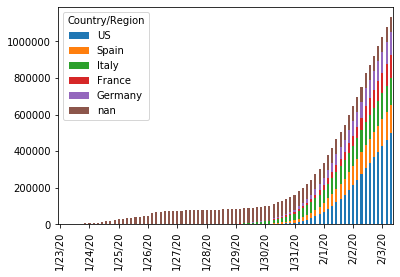

In [12]:
plt.figure(figsize=(10,9))
df10.plot.bar(stacked=True);
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

In [13]:
#Format

dft = df.T

new_header = dft.iloc[0] #grab the first row for the header
df = dft[2:] #take the data less the header row
df.columns = new_header
df.index.names = ['Date']

df.head()



Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,...,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,NaN
Date,,,,,,,,,,,,,,,,,,,,,
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,643
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,920
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1406
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2075
1/27/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2877


## Add global positive

In [14]:
#global daily positive

#pos = df.sum(axis=1)
#may also add lat/long
#df.insert(0, 'Positive', pos)

pos = df.sum(axis=1)

#may also sum lat/long
pd.Series(pos)
df.insert(0, 'glo_Positive', pos)

df.head()

Country/Region,glo_Positive,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,...,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,NaN
Date,,,,,,,,,,,,,,,,,,,,,
1/23/20,654.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,643
1/24/20,941.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,920
1/25/20,1434.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1406
1/26/20,2113.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2075
1/27/20,2921.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2877


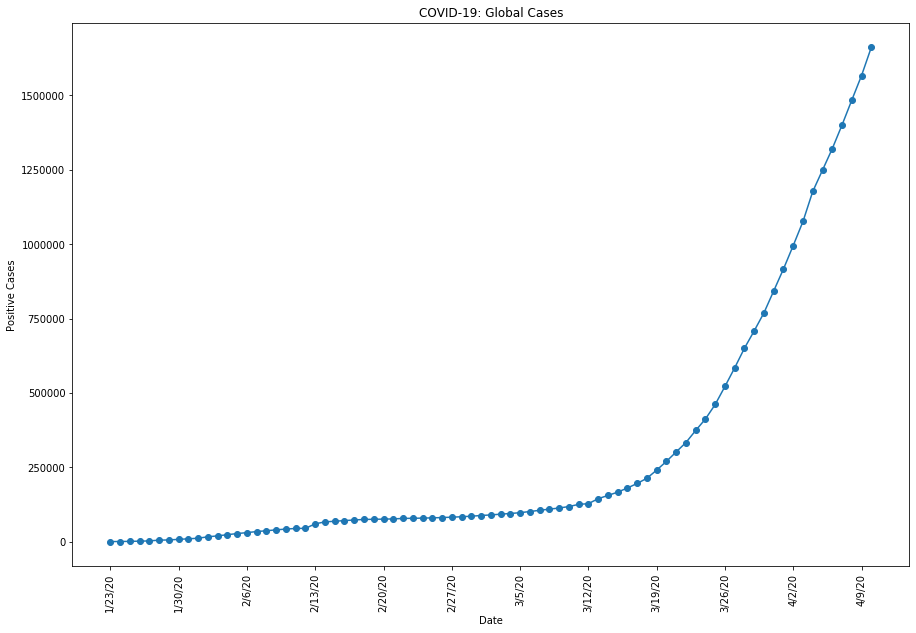

In [15]:
import matplotlib.dates as mdates
import datetime



#x_values = [datetime.datetime.strptime(d,"%m/%dd/%yy").date() for d in df.index]
#[datetime.datetime.strptime(x,'%d/%m/%y').strptime('%d/%m/%y') for x in df.index]
 
plt.figure(figsize=(15,10))
plt.plot_date(df.index,df.glo_Positive,ls='-')
#plt.plot(df.index,df.China)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

plt.title('COVID-19: Global Cases')
plt.ylabel('Positive Cases')
plt.xlabel('Date')

#ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))  
plt.xticks(rotation='vertical')
plt.show()


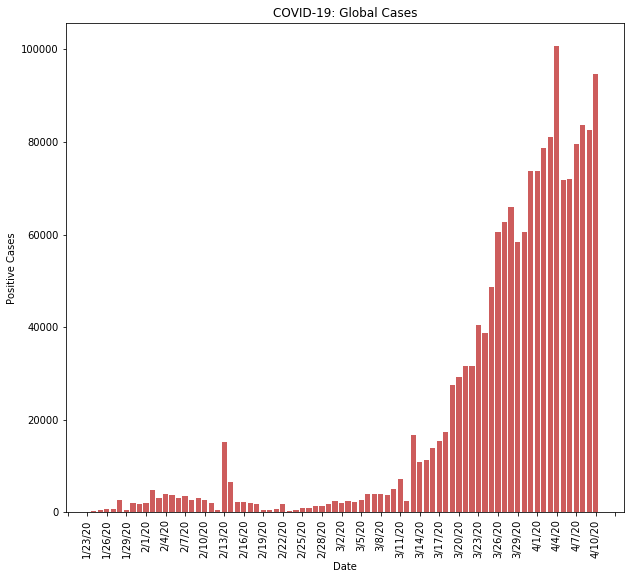

In [18]:
plt.figure(figsize=(10,9))
diff = df.diff()
#plt.bar(df.index, df.glo_Positive.values,color='coral')
plt.bar(diff.index, diff['glo_Positive'].values,color='indianred')
#ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.title('COVID-19: Global Cases')
plt.ylabel('Positive Cases')
plt.xlabel('Date')
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.show()

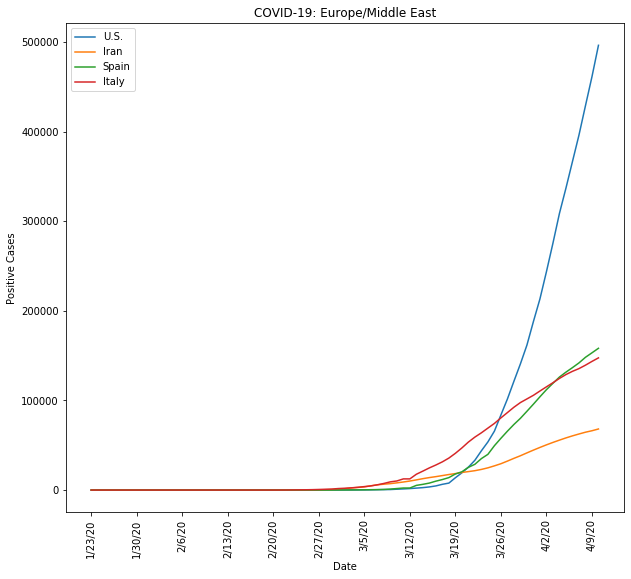

In [22]:
plt.figure(figsize=(10,9))

#plt.plot(df.index,df.China)
plt.plot(df.index,df.US)
plt.plot(df.index,df.Iran)
plt.plot(df.index,df.Spain)
plt.plot(df.index,df.Italy)
plt.legend(['U.S.','Iran','Spain','Italy'])
plt.title('COVID-19: Europe/Middle East')
plt.ylabel('Positive Cases')
plt.xlabel('Date')
plt.xticks(rotation='vertical')

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

plt.show()

Text(0.5, 0, 'Date')

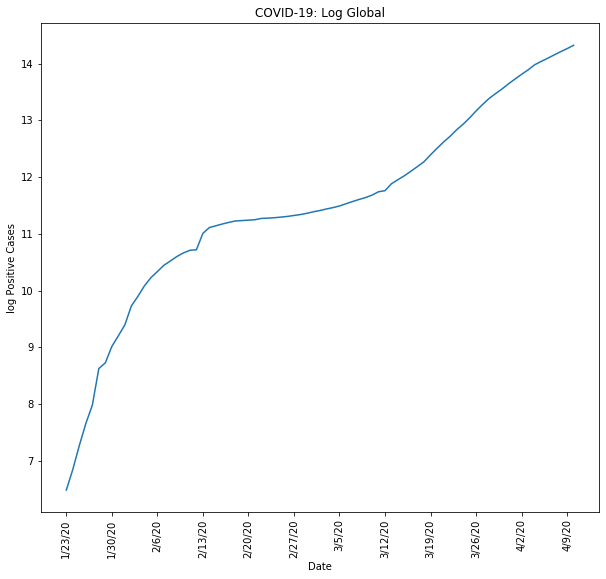

In [23]:
plt.figure(figsize=(10,9))

plt.plot(df.index,np.log(df.glo_Positive))
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.title('COVID-19: Log Global')
plt.ylabel('log Positive Cases')
plt.xticks(rotation='vertical')
plt.xlabel('Date')